In [1]:
import nflfastpy as npy
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patheffects as patheffects
import pandas as pd
import numpy as np
import urllib
from PIL import Image

### Load team color and logo data

In [2]:
team_logo_df = npy.load_team_logo_data()

### Load 2021 play-by-play data

In [3]:
df = npy.load_pbp_data(2021)

### Get Deebo Samuel rushing and receiving data

In [4]:
df_deebo = df[
    (df["rusher_player_name"] == "D.Samuel") | 
    (df["receiver_player_name"] == "D.Samuel") &
    (df["incomplete_pass"] == 0) &
    (df["interception"] == 0)
].copy()

In [5]:
df_deebo

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
2759,1026,2021_01_SF_DET,2021091204,DET,SF,REG,1,SF,away,DET,...,0,1,2.235091,0.363803,5.511636,3.0,1.000000,1.000000,0.718925,28.107512
2760,1054,2021_01_SF_DET,2021091204,DET,SF,REG,1,SF,away,DET,...,0,1,0.554130,0.430087,3.992669,2.0,0.982975,0.277121,0.496457,50.354278
2777,1443,2021_01_SF_DET,2021091204,DET,SF,REG,1,SF,away,DET,...,0,1,1.370228,0.291785,4.118719,2.0,1.000000,1.000000,0.439073,56.092697
2779,1488,2021_01_SF_DET,2021091204,DET,SF,REG,1,SF,away,DET,...,1,1,1.389195,1.066870,2.576346,2.0,0.751286,0.426213,0.707250,29.275018
2796,1876,2021_01_SF_DET,2021091204,DET,SF,REG,1,SF,away,DET,...,1,1,1.757783,0.640567,10.739427,9.0,0.619697,0.259430,0.813241,18.675858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42393,2833,2021_16_SF_TEN,2021122300,TEN,SF,REG,16,SF,away,TEN,...,0,0,1.163863,0.274753,4.555448,2.0,1.000000,0.977097,0.603081,39.691883
42397,2932,2021_16_SF_TEN,2021122300,TEN,SF,REG,16,SF,away,TEN,...,0,0,-0.604847,0.509050,7.119883,6.0,0.070172,0.046679,0.978218,2.178228
42409,3215,2021_16_SF_TEN,2021122300,TEN,SF,REG,16,SF,away,TEN,...,0,0,0.095809,0.669495,4.089498,2.0,0.610888,0.224048,0.855630,14.437038
42412,3290,2021_16_SF_TEN,2021122300,TEN,SF,REG,16,SF,away,TEN,...,0,0,4.407624,0.283366,4.029963,2.0,1.000000,0.993599,0.876650,12.335032


### Total rushing yards

In [6]:
print(f"Deebo Samuel rushing yards: {df_deebo['rushing_yards'].sum()}")

Deebo Samuel rushing yards: 301.0


### Total receiving yards

In [7]:
print(f"Deebo Samuel receiving yards: {df_deebo['receiving_yards'].sum()}")

Deebo Samuel receiving yards: 1247.0


In [8]:
df_deebo_agg = (
    df_deebo.groupby(["game_date", "week", "defteam"], as_index=False)
    .agg(
        {
            "rushing_yards": "sum",
            "air_yards": "sum",
            "yards_after_catch": "sum",
            "receiving_yards": "sum",
            "yards_gained": "sum",
            "touchdown": "sum"
        }
    )
)

In [9]:
df_deebo_agg["pace"] = 17 * df_deebo_agg["receiving_yards"].cumsum() / (df_deebo_agg.index + 1)

In [10]:
df_deebo_agg

,game_date,week,defteam,rushing_yards,air_yards,yards_after_catch,receiving_yards,yards_gained,touchdown,pace
0,2021-09-12,1,DET,0.0,80.0,109.0,189.0,189.0,1.0,3213.000000
1,2021-09-19,2,PHI,8.0,47.0,46.0,93.0,101.0,0.0,2397.000000
2,2021-09-26,3,GB,0.0,23.0,29.0,52.0,52.0,0.0,1892.666667
3,2021-10-03,4,SEA,1.0,70.0,86.0,156.0,157.0,2.0,2082.500000
4,2021-10-10,5,ARI,13.0,38.0,20.0,58.0,71.0,1.0,1863.200000
5,2021-10-24,7,IND,0.0,71.0,29.0,100.0,100.0,1.0,1836.000000
6,2021-10-31,8,CHI,0.0,74.0,97.0,171.0,171.0,0.0,1989.000000
7,2021-11-07,9,ARI,0.0,16.0,47.0,63.0,63.0,0.0,1874.250000
8,2021-11-15,10,LA,36.0,41.0,56.0,97.0,133.0,2.0,1849.222222
9,2021-11-21,11,JAX,79.0,9.0,6.0,15.0,94.0,1.0,1689.800000


### Get 49ers color data

In [11]:
sf_logo_data = team_logo_df[team_logo_df["team_abbr"] == "SF"].copy()

In [12]:
c1 = sf_logo_data["team_color"].values[0]
c2 = sf_logo_data["team_color2"].values[0]
c3 = sf_logo_data["team_color3"].values[0]
c4 = sf_logo_data["team_color4"].values[0]
bg = "#e4dbc5"

In [13]:
df_roster = npy.load_roster_data(2021)
df_deebo_metadata = df_roster[df_roster["full_name"] == "Deebo Samuel"].copy()

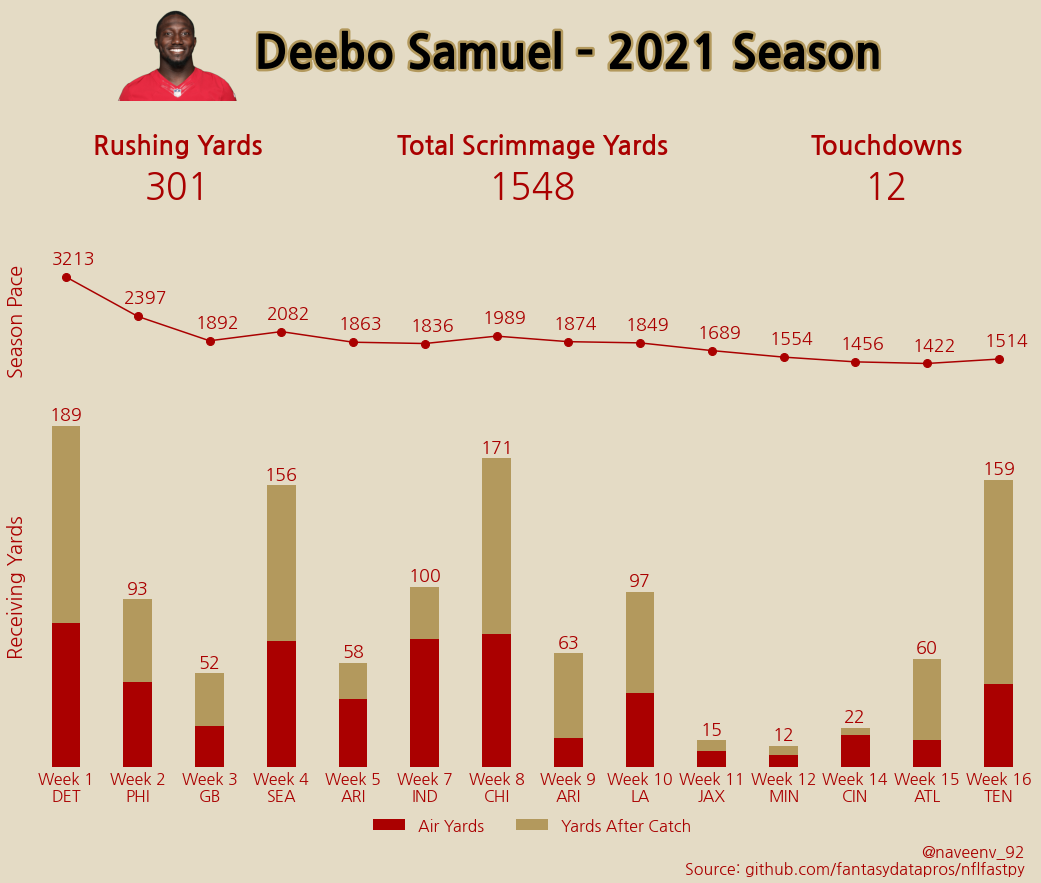

In [27]:
# Plot parameters
plt.rcParams["font.family"] = "NanumGothic"
plt.rcParams["font.size"] = 16
plt.rcParams["font.weight"] = 400
plt.rcParams["text.color"] = c1
plt.rcParams["axes.labelcolor"] = c1
plt.rcParams["xtick.color"] = c1
plt.rcParams["xtick.major.size"] = 0
plt.rcParams["ytick.color"] = c1
plt.rcParams["ytick.major.size"] = 0

# Create figure and gridspec
fig = plt.figure(figsize=(18, 14), facecolor=bg)
gs = fig.add_gridspec(6, 3, hspace=0.4)

# Create axes objects and remove frame
ax1 = fig.add_subplot(gs[3:,:])
ax2 = fig.add_subplot(gs[2, :])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])
ax6 = fig.add_subplot(gs[0, 0])
ax7 = fig.add_subplot(gs[0, 1:])
ax1.set_frame_on(False)
ax2.set_frame_on(False)
ax3.set_frame_on(False)
ax4.set_frame_on(False)
ax5.set_frame_on(False)
ax6.set_frame_on(False)
ax7.set_frame_on(False)

# Metadata
xmin = -0.5
xmax = df_deebo_agg.shape[0] - 0.5
overall_pace = 17 * df_deebo_agg["receiving_yards"].sum() / df_deebo_agg.shape[0]

## Plot air yards and YAC
labels = [f"Week {i}\n{j}" for (i,j) in zip(df_deebo_agg["week"], df_deebo_agg["defteam"])] 
ax1.bar(range(df_deebo_agg.shape[0]), df_deebo_agg["air_yards"], width=0.4, color=c1, tick_label=labels, label="Air Yards")
ax1.bar(range(df_deebo_agg.shape[0]), df_deebo_agg["yards_after_catch"], width=0.4, bottom=df_deebo_agg["air_yards"], color=c2, label="Yards After Catch")

for i, yds in enumerate(df_deebo_agg["receiving_yards"]):
    ax1.text(i, yds + 2, int(yds), ha="center", va="bottom", size=18)

ax1.set_yticks([])

ax1.set(xlim=[xmin, xmax], ylim=[0, 200])
ax1.set_ylabel("Receiving Yards", size=20)
    
ax1.legend(loc="upper center", bbox_to_anchor=[0.5, -0.1], ncol=2, frameon=False)

## Plot pace of receiving yards
#ax2.plot([xmin, xmax], [overall_pace, overall_pace], color=c1, linestyle="--")
ax2.plot(range(df_deebo_agg.shape[0]), df_deebo_agg["pace"], color=c1, marker="o", markersize=8)

for i, pace in enumerate(df_deebo_agg["pace"]):
    ax2.text(i - 0.2, pace + 225, int(pace), ha="left", va="bottom", size=18)


ax2.set(xticks=[], yticks=[])
ax2.set_ylabel("Season Pace", size=20)

ax2.set(xlim=[xmin, xmax])

## Total Rushing Yards
ax3.text(0.5, 0.5, df_deebo_agg['rushing_yards'].sum().astype(int), ha="center", va="center", size=36)
ax3.text(0.5, 0.8, "Rushing Yards", ha="center", va="bottom", size=26, fontweight=600)

ax3.set(xticks=[], yticks=[])

## Scrimmage Yards
ax4.text(0.5, 0.5, df_deebo_agg['yards_gained'].sum().astype(int), ha="center", va="center", size=36)
ax4.text(0.5, 0.8, "Total Scrimmage Yards", ha="center", va="bottom", size=26, fontweight=600)

ax4.set(xticks=[], yticks=[])

## Total Touchdowns
ax5.text(0.5, 0.5, df_deebo_agg['touchdown'].sum().astype(int), ha="center", va="center", size=36)
ax5.text(0.5, 0.8, "Touchdowns", ha="center", va="bottom", size=26, fontweight=600)

ax5.set(xticks=[], yticks=[])

## Headshot
urllib.request.urlretrieve(df_deebo_metadata["headshot_url"].values[0], "deebo.png")
img = Image.open("deebo.png")
ax6.imshow(img)

ax6.set(xticks=[], yticks=[])

## Title
ax7.text(-0.2, 0.5, "Deebo Samuel – 2021 Season", ha="left", va="center", color=c3, size=46, weight=800, path_effects=[patheffects.withStroke(linewidth=5, foreground=c2)])

ax7.set(xticks=[], yticks=[])

# Add source
ax1.text(0.99, -0.3, "@naveenv_92\nSource: github.com/fantasydatapros/nflfastpy", ha="right", va="bottom", size=16, transform=ax1.transAxes)

# Save and show figure
plt.savefig("deebo_samuel_receiving.png", dpi=500, bbox_inches="tight")
plt.show()